<center><h1 style="color:#1a1a1a;
                    font-size:3em">
        NHANES - MTech Project 
        </h1> 
        <h2 style="color:#1a1a1a;
                    font-size:2em">
        Feature Selection - Previous Studies fields - Excluded Lab Data
       </h2>
       <h3 style="color:#1a1a1a;
                    font-size:2em">
        Prakash Easow Thomas - 2022DA04285 - June 2024
       </h3>
</center>

# 1. Importing Libraries and Reading the Datasets

## 1.1 Importing the Libraries

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## 1.2 Reading the NHANES 2018 Datasets

In [5]:
merged_dfNHAENES2018_selected  = pd.read_csv('C:\Prakash\Personal\Studies\Techincal\MTech. Data Science and Engineering\Semester-wise\Semester-I\Study\Sem-I - 0- Python Fundamentals for Data Science (S1-22_DSECLPFDS)\PythonPgm\MTech-Proj03-NHANES-2018\Data\After_DataPreprocessing_NoLab.csv')

# 2. Data Verification - NHANES 2018 Data

## 2.1 Data Verification

In [7]:
print(merged_dfNHAENES2018_selected)

      RIDAGEYR  RIDRETH3  RIAGENDR  BMXBMI  DIQ175A  RHQ162  DR1TALCO  DID260  \
0         66.0       4.0       2.0    31.7      2.0     2.0       0.0     0.0   
1         18.0       6.0       1.0    21.5      2.0     2.0       0.0     0.0   
2         13.0       7.0       1.0    18.1      2.0     2.0       0.0     0.0   
3         66.0       6.0       2.0    23.7      2.0     1.0       0.0     0.0   
4         75.0       4.0       2.0    38.9      2.0     2.0       0.0     0.0   
...        ...       ...       ...     ...      ...     ...       ...     ...   
5946      70.0       6.0       2.0    20.0      2.0     2.0       0.0     0.0   
5947      42.0       1.0       1.0    35.8      2.0     2.0       0.0     0.0   
5948      41.0       4.0       2.0    26.1      2.0     2.0       0.0     0.0   
5949      14.0       4.0       2.0    45.6      2.0     2.0       0.0     0.0   
5950      38.0       3.0       1.0    36.1      2.0     2.0       0.0     0.0   

      BPXOSY1  BPXODI1  ...

In [8]:
nan_counts = merged_dfNHAENES2018_selected.isna().sum()
print("\nCount of NaN values in each column:")
print(nan_counts)


Count of NaN values in each column:
RIDAGEYR                      0
RIDRETH3                      0
RIAGENDR                      0
BMXBMI                        0
DIQ175A                       0
RHQ162                        0
DR1TALCO                      0
DID260                        0
BPXOSY1                       0
BPXODI1                       0
BPXOSY2                       0
BPXODI2                       0
BPXOSY3                       0
BPXODI3                       0
MCQ160B                       0
DS2TCHOL                      0
DSQTCHOL                      0
DMDEDUC3                      0
DMDEDUC2                      0
CBD765                        0
BPD035                        0
BPQ040A                       0
IND235                        0
DIQ050                        0
RIDEXPRG                      0
SLD012                        0
BMXWAIST                      0
DIQ070                        0
Physically_Active_Classify    0
LBXGH_Classify                0
dty

# 3. Correlation Analysis

## 3.1 Normalizing the data 

In [10]:
min_max_scaler = MinMaxScaler()
normalized_df1 = pd.DataFrame(min_max_scaler.fit_transform(merged_dfNHAENES2018_selected), columns=merged_dfNHAENES2018_selected.columns)
print(normalized_df1)

      RIDAGEYR  RIDRETH3  RIAGENDR    BMXBMI  DIQ175A    RHQ162  DR1TALCO  \
0     0.794118  0.500000       1.0  0.253425      0.2  0.666667       0.0   
1     0.088235  0.833333       0.0  0.113699      0.2  0.666667       0.0   
2     0.014706  1.000000       0.0  0.067123      0.2  0.666667       0.0   
3     0.794118  0.833333       1.0  0.143836      0.2  0.333333       0.0   
4     0.926471  0.500000       1.0  0.352055      0.2  0.666667       0.0   
...        ...       ...       ...       ...      ...       ...       ...   
5946  0.852941  0.833333       1.0  0.093151      0.2  0.666667       0.0   
5947  0.441176  0.000000       0.0  0.309589      0.2  0.666667       0.0   
5948  0.426471  0.500000       1.0  0.176712      0.2  0.666667       0.0   
5949  0.029412  0.500000       1.0  0.443836      0.2  0.666667       0.0   
5950  0.382353  0.333333       0.0  0.313699      0.2  0.666667       0.0   

      DID260   BPXOSY1   BPXODI1  ...  BPD035  BPQ040A    IND235  DIQ050  \

In [11]:
#min_max_scaler = MinMaxScaler()
#normalized_df1 = pd.DataFrame(min_max_scaler.fit_transform(merged_dfNHAENES2018_selected), columns=merged_dfNHAENES2018_selected.columns)
normalized_df1.corr()

,RIDAGEYR,RIDRETH3,RIAGENDR,BMXBMI,DIQ175A,RHQ162,DR1TALCO,DID260,BPXOSY1,BPXODI1,...,BPD035,BPQ040A,IND235,DIQ050,RIDEXPRG,SLD012,BMXWAIST,DIQ070,Physically_Active_Classify,LBXGH_Classify
RIDAGEYR,1.000000,-0.011855,-0.004772,0.167197,-0.018453,-0.005948,0.004113,0.186608,0.490451,0.208799,...,0.539028,-0.480093,-0.023587,-0.173455,0.034009,-0.031161,0.235700,-0.294122,-0.197913,0.475622
RIDRETH3,-0.011855,1.000000,-0.011755,-0.102861,0.003769,0.023985,-0.017195,-0.015396,0.019633,0.058404,...,0.020752,-0.022191,0.098413,0.017519,0.002054,-0.032689,-0.100331,-0.012348,0.020514,0.048988
RIAGENDR,-0.004772,-0.011755,1.000000,0.069924,0.056661,-0.152295,-0.124241,-0.027435,-0.121921,-0.035595,...,-0.007993,0.003196,-0.019275,0.029484,-0.037886,0.054788,-0.089849,0.041677,-0.132489,-0.038279
BMXBMI,0.167197,-0.102861,0.069924,1.000000,0.126978,-0.084981,-0.010582,0.095264,0.089078,0.232946,...,0.180513,-0.212592,-0.042641,-0.095077,-0.027373,-0.071735,0.674321,-0.160651,-0.051514,0.266425
DIQ175A,-0.018453,0.003769,0.056661,0.126978,1.000000,-0.053250,0.015344,-0.103176,-0.002281,0.084392,...,0.002648,-0.007969,0.026758,0.085082,-0.010695,-0.036940,0.102037,0.117037,0.011715,0.011601
RHQ162,-0.005948,0.023985,-0.152295,-0.084981,-0.053250,1.000000,0.008079,-0.043209,0.019080,-0.021934,...,-0.007945,0.020465,-0.001418,0.062846,0.029449,0.017987,-0.074960,0.058606,0.024491,-0.065386
DR1TALCO,0.004113,-0.017195,-0.124241,-0.010582,0.015344,0.008079,1.000000,-0.033632,0.062533,0.097885,...,0.001980,0.010334,0.023391,0.032976,0.017829,-0.040503,0.040626,0.036424,0.058239,-0.078637
DID260,0.186608,-0.015396,-0.027435,0.095264,-0.103176,-0.043209,-0.033632,1.000000,0.088246,-0.003204,...,0.169498,-0.179142,-0.026010,-0.389032,0.013235,0.000250,0.101127,-0.433313,-0.077529,0.265705
BPXOSY1,0.490451,0.019633,-0.121921,0.089078,-0.002281,0.019080,0.062533,0.088246,1.000000,0.611188,...,0.385086,-0.358142,-0.053426,-0.077530,0.041829,-0.042273,0.147936,-0.140572,-0.074388,0.275104
BPXODI1,0.208799,0.058404,-0.035595,0.232946,0.084392,-0.021934,0.097885,-0.003204,0.611188,1.000000,...,0.187271,-0.199780,-0.026123,0.039506,0.049063,-0.054539,0.199095,-0.035826,-0.034317,0.156170


## 3.2 Applying the Correlation and Heat map

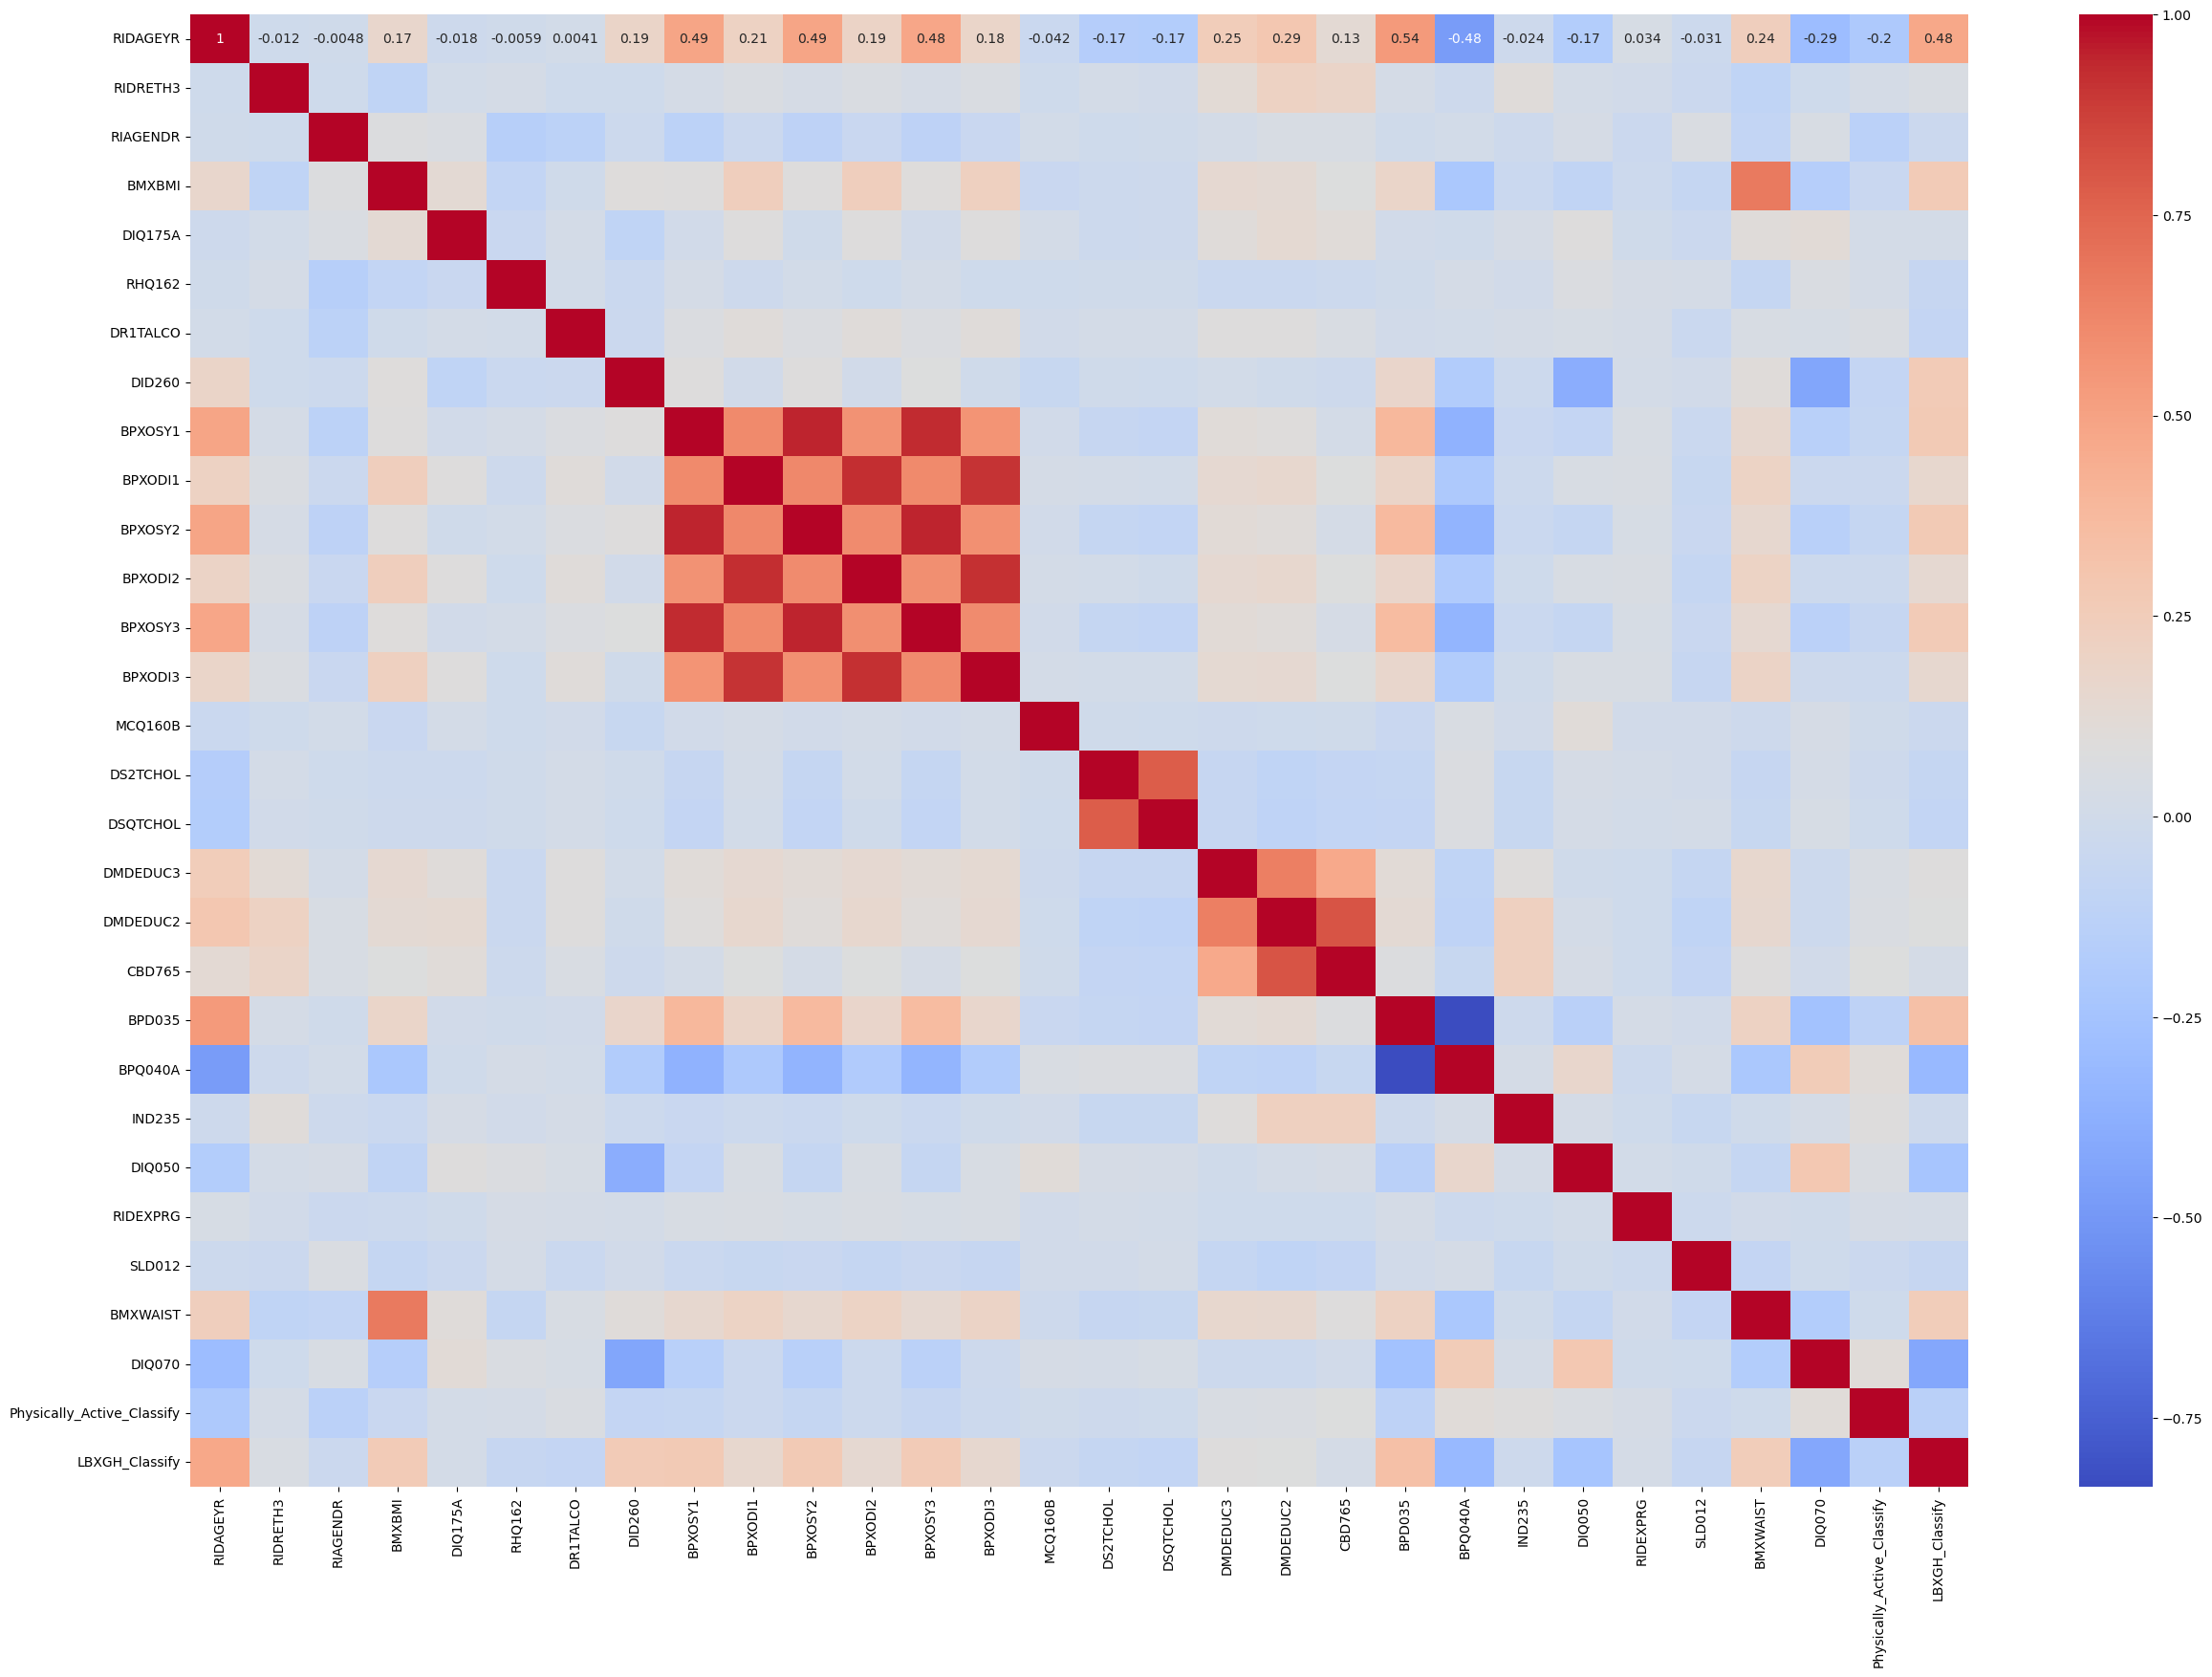

In [13]:
corr1 = normalized_df1.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(corr1, annot=True, cmap='coolwarm',annot_kws={"size": 10})
plt.show()

In [14]:
print(corr1.columns)

Index(['RIDAGEYR', 'RIDRETH3', 'RIAGENDR', 'BMXBMI', 'DIQ175A', 'RHQ162',
       'DR1TALCO', 'DID260', 'BPXOSY1', 'BPXODI1', 'BPXOSY2', 'BPXODI2',
       'BPXOSY3', 'BPXODI3', 'MCQ160B', 'DS2TCHOL', 'DSQTCHOL', 'DMDEDUC3',
       'DMDEDUC2', 'CBD765', 'BPD035', 'BPQ040A', 'IND235', 'DIQ050',
       'RIDEXPRG', 'SLD012', 'BMXWAIST', 'DIQ070',
       'Physically_Active_Classify', 'LBXGH_Classify'],
      dtype='object')


In [15]:
def correlation(dataset, threshold):
    df = pd.DataFrame(columns=['Correlation Field', 'Field Name ','Correlation Value'])
    col_corr = set()
    k=0
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
#            if abs(corr_matrix.iloc[i,j]) > threshold:
            if  corr_matrix.iloc[i,j]  > threshold:
                colnamei = corr_matrix.columns[i]
                colnamej = corr_matrix.columns[j]
#                print("i "+colname) 
#                print("j " +colnamej)
                if (colnamei == 'LBXGH_Classify' and corr_matrix.iloc[i,j]  > 0): 
#                    print(colnamei + ' '+colnamej +' ' + str( corr_matrix.iloc[i,j])) 
                    new_row =pd.DataFrame({'Correlation Field': [colnamei], 'Field Name ': [colnamej],'Correlation Value':[corr_matrix.iloc[i,j]]})
                    df = pd.concat([df, new_row], ignore_index=True)
                    
                col_corr.add(colnamei)
    return col_corr,df

In [16]:
corr1_features,corr_data =correlation(normalized_df1,0)

C:\Users\praka\AppData\Local\Temp\ipykernel_37124\2620094510.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)


In [17]:
print(corr_data)

   Correlation Field Field Name   Correlation Value
0     LBXGH_Classify    RIDAGEYR           0.475622
1     LBXGH_Classify    RIDRETH3           0.048988
2     LBXGH_Classify      BMXBMI           0.266425
3     LBXGH_Classify     DIQ175A           0.011601
4     LBXGH_Classify      DID260           0.265705
5     LBXGH_Classify     BPXOSY1           0.275104
6     LBXGH_Classify     BPXODI1           0.156170
7     LBXGH_Classify     BPXOSY2           0.274577
8     LBXGH_Classify     BPXODI2           0.142687
9     LBXGH_Classify     BPXOSY3           0.266720
10    LBXGH_Classify     BPXODI3           0.147513
11    LBXGH_Classify    DMDEDUC3           0.088532
12    LBXGH_Classify    DMDEDUC2           0.079373
13    LBXGH_Classify      CBD765           0.021021
14    LBXGH_Classify      BPD035           0.333275
15    LBXGH_Classify    RIDEXPRG           0.022287
16    LBXGH_Classify    BMXWAIST           0.249013


In [18]:
print(corr1_features)

{'DMDEDUC2', 'RHQ162', 'BMXBMI', 'BPXOSY2', 'BPXODI2', 'BMXWAIST', 'BPXOSY1', 'DR1TALCO', 'BPXOSY3', 'DIQ175A', 'DIQ070', 'DID260', 'LBXGH_Classify', 'DIQ050', 'DMDEDUC3', 'Physically_Active_Classify', 'IND235', 'RIDEXPRG', 'DS2TCHOL', 'DSQTCHOL', 'SLD012', 'BPXODI1', 'BPXODI3', 'MCQ160B', 'CBD765', 'BPD035', 'BPQ040A'}


In [19]:
df_fnd = pd.read_csv('C:\Prakash\Personal\Studies\Techincal\MTech. Data Science and Engineering\Semester-wise\Semester-I\Study\Sem-I - 0- Python Fundamentals for Data Science (S1-22_DSECLPFDS)\PythonPgm\MTech-Proj03-NHANES-2018\Field_Names_Details.csv')
filtered_df_fnd = df_fnd[df_fnd['Field Name '].isin(corr1_features)]
columns_to_select = ['File','Field Name ','Field Descriptions']
selected_filtered_df_fnd =filtered_df_fnd[columns_to_select]
print(selected_filtered_df_fnd.head(50))

              File                 Field Name   \
15     Demographic                    DMDEDUC3   
16     Demographic                    DMDEDUC2   
18     Demographic                    RIDEXPRG   
122        Dietary                    DR1TALCO   
345        Dietary                    DS2TCHOL   
383        Dietary                    DSQTCHOL   
521    Examination                     BPXOSY1   
522    Examination                     BPXODI1   
523    Examination                     BPXOSY2   
524    Examination                     BPXODI2   
525    Examination                     BPXOSY3   
526    Examination                     BPXODI3   
539    Examination                      BMXBMI   
546    Examination                    BMXWAIST   
1358  Questionaire                      BPD035   
1359  Questionaire                     BPQ040A   
1457  Questionaire                      CBD765   
1480  Questionaire                     DIQ175A   
1505  Questionaire                      DIQ050   


In [20]:
print(corr_data)  # Correlated data based on HbA1c

   Correlation Field Field Name   Correlation Value
0     LBXGH_Classify    RIDAGEYR           0.475622
1     LBXGH_Classify    RIDRETH3           0.048988
2     LBXGH_Classify      BMXBMI           0.266425
3     LBXGH_Classify     DIQ175A           0.011601
4     LBXGH_Classify      DID260           0.265705
5     LBXGH_Classify     BPXOSY1           0.275104
6     LBXGH_Classify     BPXODI1           0.156170
7     LBXGH_Classify     BPXOSY2           0.274577
8     LBXGH_Classify     BPXODI2           0.142687
9     LBXGH_Classify     BPXOSY3           0.266720
10    LBXGH_Classify     BPXODI3           0.147513
11    LBXGH_Classify    DMDEDUC3           0.088532
12    LBXGH_Classify    DMDEDUC2           0.079373
13    LBXGH_Classify      CBD765           0.021021
14    LBXGH_Classify      BPD035           0.333275
15    LBXGH_Classify    RIDEXPRG           0.022287
16    LBXGH_Classify    BMXWAIST           0.249013


In [21]:
df_fnd = pd.read_csv('C:\Prakash\Personal\Studies\Techincal\MTech. Data Science and Engineering\Semester-wise\Semester-I\Study\Sem-I - 0- Python Fundamentals for Data Science (S1-22_DSECLPFDS)\PythonPgm\MTech-Proj03-NHANES-2018\Field_Names_Details.csv')
filtered_df_fnd = df_fnd[df_fnd['Field Name '].isin(corr_data['Field Name '])]
columns_to_select = ['File','Field Name ','Field Descriptions']
selected_filtered_df_fnd =filtered_df_fnd[columns_to_select]
#print(selected_filtered_df_fnd.head(50))
common_key = 'Field Name '
Final_HbA1c_Correlated_Data = corr_data.merge(selected_filtered_df_fnd, on=common_key, how='outer')
Final_HbA1c_Correlated_Data = Final_HbA1c_Correlated_Data.sort_values(by='Correlation Value')
print('************** Correlated field based on HbA1c********************')
print(Final_HbA1c_Correlated_Data)

************** Correlated field based on HbA1c********************
   Correlation Field Field Name   Correlation Value          File  \
3     LBXGH_Classify     DIQ175A           0.011601  Questionaire   
13    LBXGH_Classify      CBD765           0.021021  Questionaire   
15    LBXGH_Classify    RIDEXPRG           0.022287   Demographic   
1     LBXGH_Classify    RIDRETH3           0.048988   Demographic   
12    LBXGH_Classify    DMDEDUC2           0.079373   Demographic   
11    LBXGH_Classify    DMDEDUC3           0.088532   Demographic   
8     LBXGH_Classify     BPXODI2           0.142687   Examination   
10    LBXGH_Classify     BPXODI3           0.147513   Examination   
6     LBXGH_Classify     BPXODI1           0.156170   Examination   
16    LBXGH_Classify    BMXWAIST           0.249013   Examination   
4     LBXGH_Classify      DID260           0.265705  Questionaire   
2     LBXGH_Classify      BMXBMI           0.266425   Examination   
9     LBXGH_Classify     BPXOSY3    